# The classification of iris flowers
Adrianna Czerwińska. [Reference](https://www.kaggle.com/adaczerwiska/iris-flowers-classification)


In this project we will use [iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset to visualize and analyze the data. 

We will also do the classification of the iris flowers by using machine learning concepts.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from pandas.plotting import scatter_matrix

%matplotlib inline

sns.set()
sns.set_palette('Set2')
warnings.filterwarnings('ignore')

## Load Data

In [87]:
# read data
clsnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv('..//..//data//iris.data.csv', names = clsnames)
iris.shape

(150, 5)

## Data Explore

In [88]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [90]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [91]:
pd.DataFrame(iris.groupby('class').size()).head()

,0
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## Data visualization

### Sepal Features

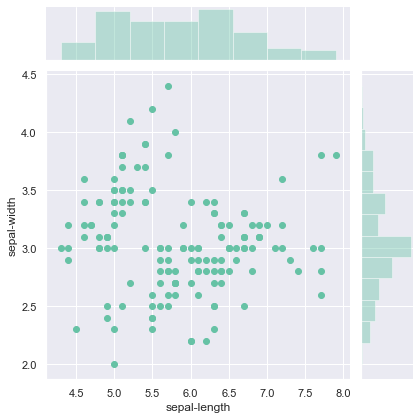

In [92]:
sns.jointplot(x='sepal-length', y='sepal-width', data=iris)

Text(0.5, 1, 'Sepal length vs width')

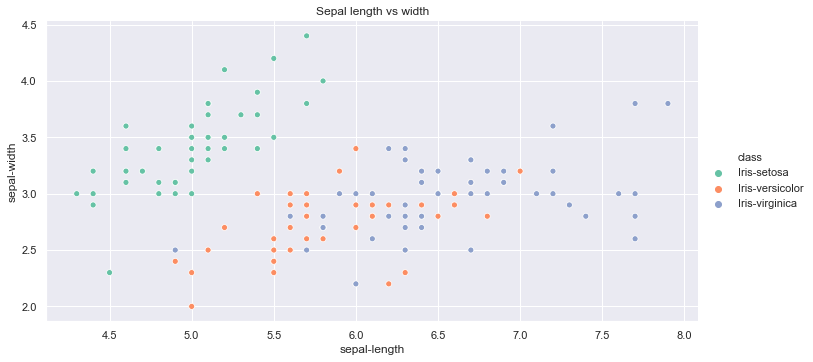

In [93]:
sns.relplot(x='sepal-length', y='sepal-width', hue='class', data=iris, height=5, aspect=10/5)
plt.title('Sepal length vs width')

### Petal Features

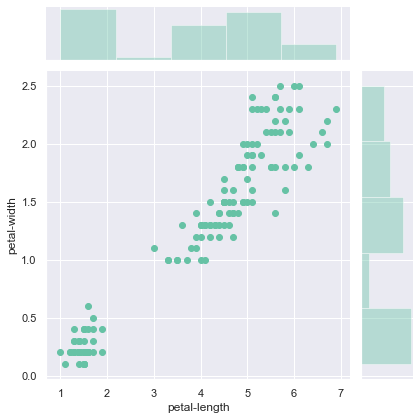

In [94]:
sns.jointplot(x='petal-length', y='petal-width', data=iris)

Text(0.5, 1, 'Petal length vs width')

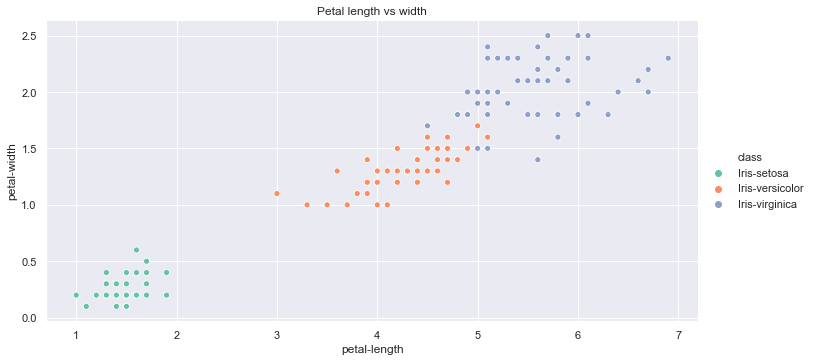

In [95]:
sns.relplot(x='petal-length', y='petal-width', hue='class', data=iris, height=5, aspect=10/5)
plt.title('Petal length vs width')

`Note`. As we can see, the petal features are easier to cluster comparing to the sepal features. It means that the petal features can help to create better and more accurate predictions over the sepal features. I will check it later.

### Sepal and Petal Featrues

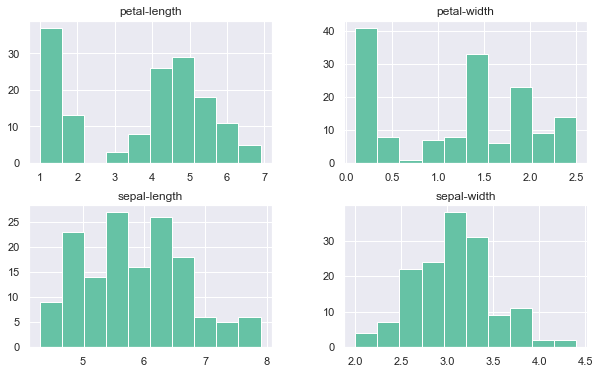

In [96]:
iris.hist(figsize=(10, 6))
plt.show()

Text(0.5, 1.0, 'Length vs width by class')

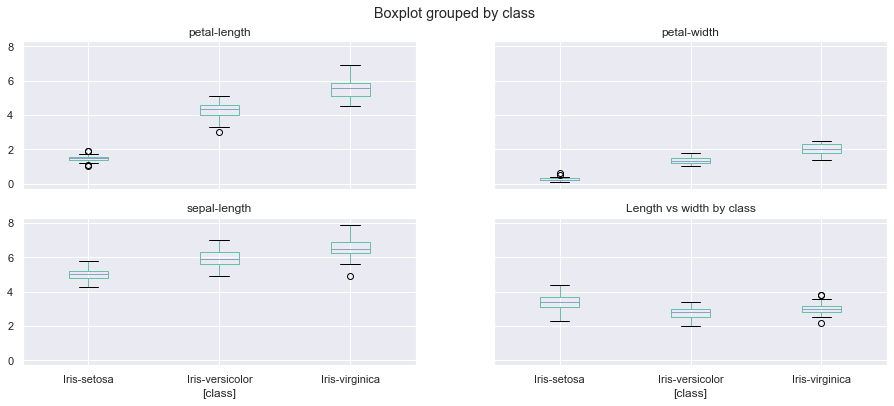

In [97]:
iris.boxplot(by='class', figsize=(15, 6))
plt.title('Length vs width by class')

Text(0.5, 1.0, 'Length vs width by class')

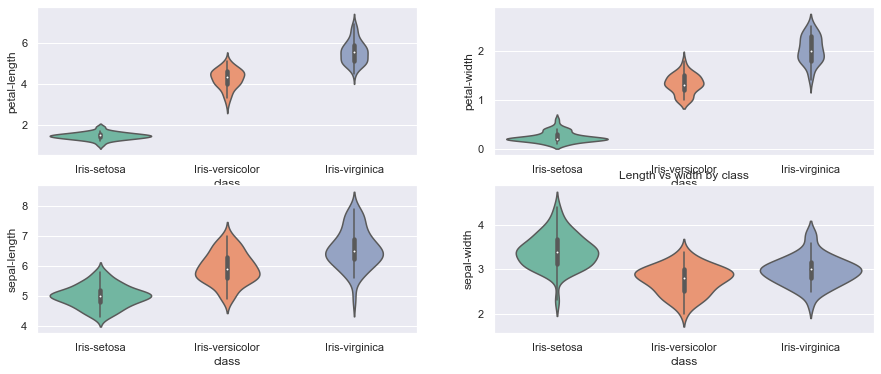

In [98]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.violinplot(x='class', y='petal-length', data=iris)

plt.subplot(2,2,2)
sns.violinplot(x='class', y='petal-width', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='class', y='sepal-length', data=iris)

plt.subplot(2,2,4)
sns.violinplot(x='class', y='sepal-width', data=iris)

plt.title('Length vs width by class')

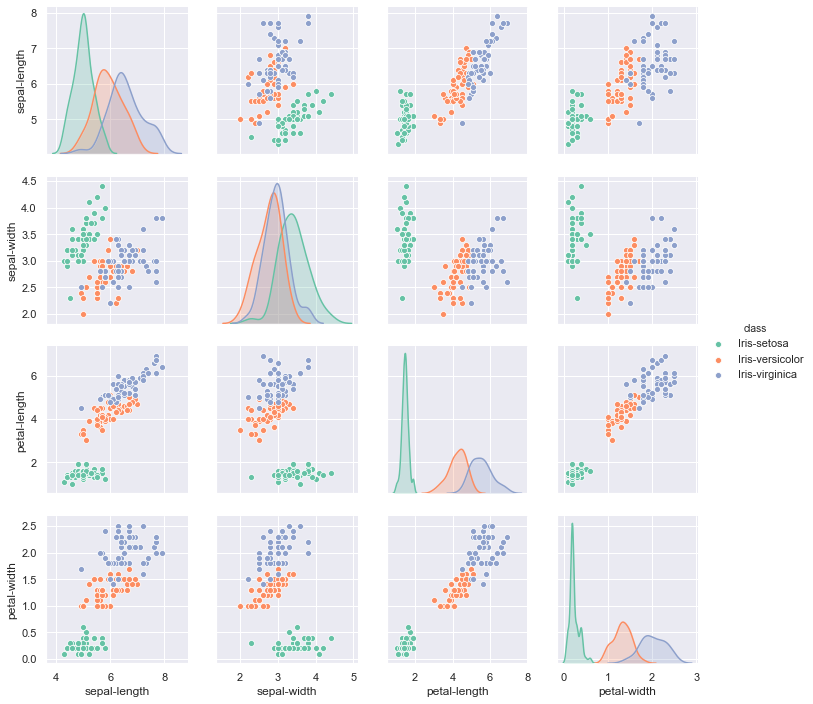

In [99]:
sns.pairplot(iris, hue='class', size=2.5)
plt.show()

## Classification Approach

In this classification problem we will use following algorithms:

- Logistic regression
- Decision tree
- Stochastic Gradient Descent
- K-Nearest Neighbors
- Support Vector Machines
- Naive Bayes Classification
- Random forest

In [100]:
#to load iris already in int
from sklearn import datasets 

#to split the dataset for training and testing
from sklearn.model_selection import train_test_split 

#for checking the model accuracy
from sklearn.metrics import accuracy_score 

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

To do the calculations, we going to represent the features and labels as int instead of string.

Since the iris dataset is already represented as int in build in function of scikit learn library, we will load and also assign the features and target variable to separate variables x and y, where:

x - features (sepal or petal),
y - classes (setosa, versicolor ot virginica).

SyntaxError: invalid syntax (<ipython-input-100-5689e451bba2>, line 13)

In [101]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
print('The unique classes are: ' + str(np.unique(y)) + '.')

The unique classes are: [0 1 2].


Unique values are:

- 0 - iris setosa
- 1 - iris versicolor
- 2 - iris virginica

Process involves both training and testing, we will create training and testing datasets, where:

- x_train - training features
- x_test - testing features
- y_train - training class
- y_test - testing class

In [102]:
#test_size - ratio między training a testing (0.2 = 20% ze 150 to testing, reszta to training)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

print('There are {} samples in the training set and {} samples in the testing set.'.format(x_train.shape[0], x_test.shape[0]))

There are 120 samples in the training set and 30 samples in the testing set.


### StandardScaler

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

# Train the algorithm with the training data and the training output
model_lr.fit(x_train, y_train)

# Test data with training model
prediction = model_lr.predict(x_test)

print('The accuracy of the logistic regression is: %0.3f' % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the logistic regression is: %0.3f' % model_lr.score(x_train, y_train), 'on training set.\n')

print(classification_report(prediction, y_test))

The accuracy of the logistic regression is: 0.967 on testing set.
The accuracy of the logistic regression is: 0.975 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



Confusion matrix, without normalization
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.92307692 0.07692308]
 [0.         0.         1.        ]]


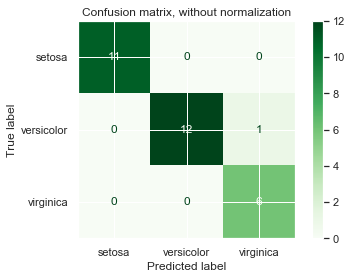

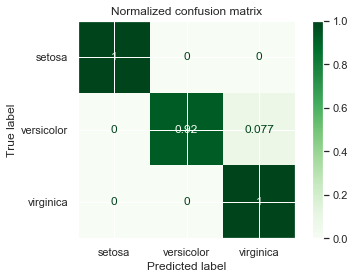

In [105]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_lr, 
                                    x_test, 
                                    y_test,
                                    display_labels=class_names,
                                    cmap=plt.cm.Greens,
                                    normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

In [106]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Stochastic Gradient Descent

In [107]:
from sklearn.linear_model import SGDClassifier

model_sgc = SGDClassifier(loss='modified_huber', shuffle=True, random_state=1)

model_sgc.fit(x_train, y_train)

prediction = model_sgc.predict(x_test)
print('The accuracy of the stochastic gradient descent is: %0.3f' % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the stochastic gradient descent is: %0.3f' % model_sgc.score(x_train, y_train), 'on training set.\n') 

print(classification_report(prediction, y_test))

The accuracy of the stochastic gradient descent is: 0.933 on testing set.
The accuracy of the stochastic gradient descent is: 0.958 on training set.

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.85      1.00      0.92        11
           2       1.00      0.86      0.92         7

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



Confusion matrix, without normalization
[[11  0  0]
 [ 1 11  1]
 [ 0  0  6]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.07692308 0.84615385 0.07692308]
 [0.         0.         1.        ]]


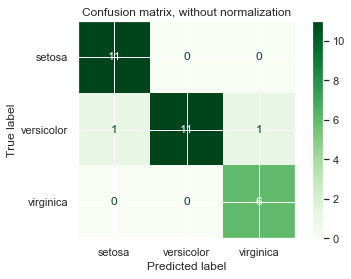

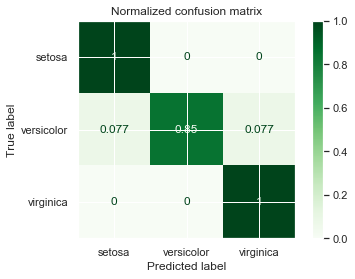

In [108]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_sgc, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

### Decision tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=10, random_state=1, max_features=None, min_samples_leaf=15)
model_dt.fit(x_train, y_train)
prediction = model_dt.predict(x_test)

print('The accuracy of the decision tree is: %0.3f' % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the decision tree is: %0.3f' % model_dt.score(x_train, y_train), 'on training set.\n') 

print(classification_report(prediction, y_test))

The accuracy of the decision tree is: 0.967 on testing set.
The accuracy of the decision tree is: 0.958 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



Confusion matrix, without normalization
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.92307692 0.07692308]
 [0.         0.         1.        ]]


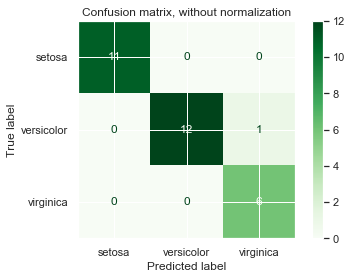

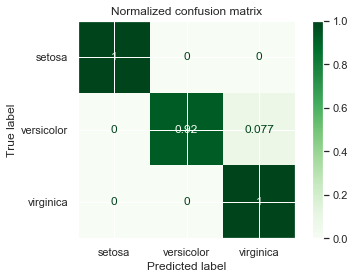

In [110]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_dt, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

In [111]:
### K-Nearest Neighbors

Text(0.5, 1.0, 'Accuracy scores of KKN model for different k values')

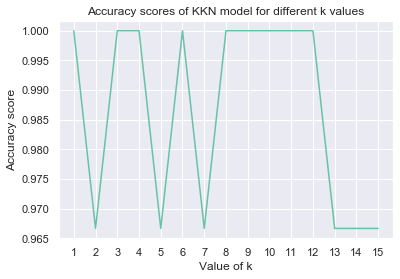

In [112]:
from sklearn.neighbors import KNeighborsClassifier

a_index = list(range(1,16))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for k in list(range(1,16)):
    model_knn = KNeighborsClassifier(n_neighbors=k) 
    model_knn.fit(x_train, y_train)
    prediction = model_knn.predict(x_test)
    a = a.append(pd.Series(accuracy_score(prediction, y_test)))
    
plt.plot(a_index, a)
plt.xticks(x)

plt.xlabel('Value of k')
plt.ylabel('Accuracy score')
plt.title('Accuracy scores of KKN model for different k values')

The graph above shows the accuracy for the KNN models using different values of k.

As we can see, the accuracy = 1 is for values 1, 3, 4, 6, 8, 9, 10, 11, 12, 13. Other values have accuraccy = 0.967.

In this case, we will choose k = 9 for KKN model. We already know, that the accuracy is 100%.

In [113]:
model_knn = KNeighborsClassifier(n_neighbors=9)

model_knn.fit(x_train, y_train)
prediction = model_knn.predict(x_test)
print('The accuracy of the k-nearest neighbors is: %0.3f' % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the k-nearest neighbors is: %0.3f' % model_knn.score(x_train, y_train), 'on training set.\n') 

print(classification_report(prediction, y_test))

The accuracy of the k-nearest neighbors is: 1.000 on testing set.
The accuracy of the k-nearest neighbors is: 0.950 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion matrix, without normalization
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


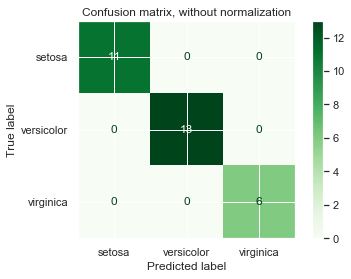

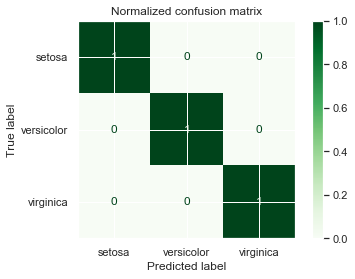

In [114]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_knn, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

In [115]:
### Support Vector Machines

In [116]:
from sklearn.svm import SVC 

model_svm = SVC(kernel='linear')

model_svm.fit(x_train, y_train)
prediction = model_svm.predict(x_test)
print('The accuracy of the support vector machines is: %0.3f' % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the support vector machines is: %0.3f' % model_svm.score(x_train, y_train), 'on training set.\n') 

print(classification_report(prediction, y_test))

The accuracy of the support vector machines is: 0.967 on testing set.
The accuracy of the support vector machines is: 0.967 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



Confusion matrix, without normalization
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.92307692 0.07692308]
 [0.         0.         1.        ]]


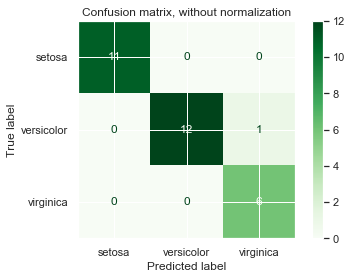

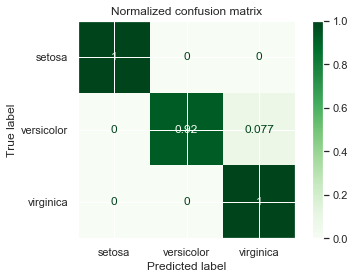

In [117]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_svm, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

### Naive Bayes Classification

In [118]:
from sklearn.naive_bayes import GaussianNB 

model_nbc = GaussianNB()

model_nbc.fit(x_train, y_train) 
prediction = model_nbc.predict(x_test) 
print('The accuracy of the naive bayes classification is: %0.3f' % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the naive bayes classification is: %0.3f' % model_nbc.score(x_train, y_train), 'on training set.\n') 

print(classification_report(prediction, y_test))

The accuracy of the naive bayes classification is: 0.967 on testing set.
The accuracy of the naive bayes classification is: 0.950 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



Confusion matrix, without normalization
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.92307692 0.07692308]
 [0.         0.         1.        ]]


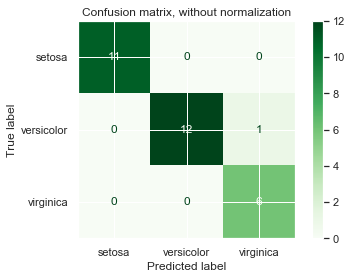

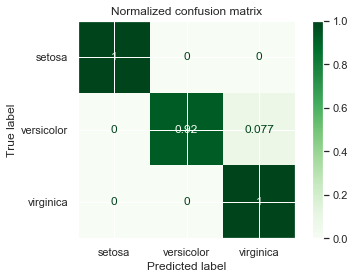

In [119]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_nbc, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

### Random forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=120, oob_score=True, n_jobs=-1, 
                              random_state=1, max_features=None, min_samples_leaf=10)
model_rf.fit(x_train, y_train)
prediction = model_rf.predict(x_test)
print('The accuracy of the random forest is: %0.3f' % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the random forest is: %0.3f' % model_rf.score(x_train, y_train), 'on training set.\n') 
 
print(classification_report(prediction, y_test))

The accuracy of the random forest is: 0.967 on testing set.
The accuracy of the random forest is: 0.983 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



Confusion matrix, without normalization
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.92307692 0.07692308]
 [0.         0.         1.        ]]


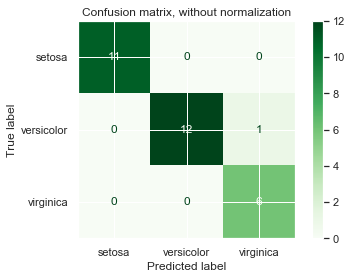

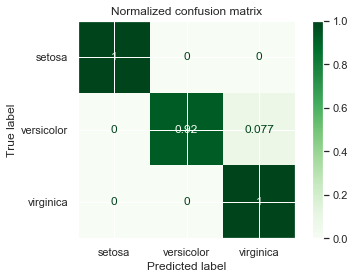

In [121]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_rf, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

In [122]:
 acc_table = {
 'Algorithm': ['Logistic regression', 'Stochastic Gradient Descent', 'Decision tree', 
               'K-Nearest Neighbors', 'Support Vector Machines', 
               'Naive Bayes Classification', 'Random forest'],
 'Accuracy testing set': ['97%', '93%', '97%', '100%', '97%', '97%', '97%'],
 'Accuracy training set': ['98%', '96%', '96%', '95%', '97%', '95%', '98%']
 }

table = pd.DataFrame(acc_table, columns=['Algorithm', 'Accuracy testing set', 'Accuracy training set'])
table

,Algorithm,Accuracy testing set,Accuracy training set
0,Logistic regression,97%,98%
1,Stochastic Gradient Descent,93%,96%
2,Decision tree,97%,96%
3,K-Nearest Neighbors,100%,95%
4,Support Vector Machines,97%,97%
5,Naive Bayes Classification,97%,95%
6,Random forest,97%,98%


In [123]:
## Choosing the best algorithm for the classification problem:

At this point, the best accuracy has KNN model, which is 100%. Thus, we will proceed with this model for k = 9.

SyntaxError: invalid syntax (<ipython-input-123-af3897f43154>, line 3)

In [124]:
x = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x, y)

#sepal_l = input("Insert sepal lenght: ")
#sepal_w = input("Insert sepal width: ")
#petal_l = input("Insert petal lenght: ")
#petal_w = input("Insert petal width: ")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [125]:
#iris_class = knn.predict([[sepal_l, sepal_w, petal_l, petal_w]])
iris_class = knn.predict([[5.1, 3.5, 1.4, 0.2]])

def prediction(iris_class):
    if iris_class == 0:
        print('Predicted class: iris setosa.')
    elif iris_class == 1:
        print('Predicted class: iris versicolor.')
    else:
        print('Predicted class: iris virginica.')

prediction(iris_class)

Predicted class: iris setosa.
